<a href="https://colab.research.google.com/github/asim5800/X21/blob/main/arya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Arya.Ai Assignment (Binary Classification)**

In [116]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#versions of various libraries used
print(pd.__version__)
print(np.__version__)
print(pylab.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.1.5
1.19.5
1.19.5
0.11.2
1.0.1


#***Data Preprocessing and EDA***

In [117]:
#Loading  Dataset
df= pd.read_csv('/content/drive/MyDrive/Arya_DataScientist_Assignment/training_set.csv', low_memory= False)

In [118]:
#displaying head of dataframe
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [119]:
#checking shape of dataframe
df.shape

(3910, 59)

In [120]:
#checking info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [121]:
#checking presence of null values in our dataframe
df.isnull().values.any()

False

In [122]:
#statistical description of dataset
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [123]:
#displaying tail of dataframe
df.tail(6)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3904,3904,0.00,0.0,0.77,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.77,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.77,0.0,0.0,0.0,2.32,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.77,0.0,0.102,0.0,0.102,0.000,0.000,4.771,26,167,0
3905,3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.12,0.25,0.0,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.00,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.00,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,0.48,0.00,0.00,0.0,1.44,0.48,0.48,2.41,0.00,0.0,0.96,0.0,0.0,0.48,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.48,0.0,0.00,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


In [124]:
#checking columns of  dataframe
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [125]:
#removing redundant features from dataframe
col=['Unnamed: 0']
df.drop(col, axis=1, inplace=True)

In [126]:
#checking head of fixed dataframe
df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.000,0.000,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.00,1.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.56,0.0,0.0,0.00,0.000,0.083,0.000,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.70,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.00,2.58,0.0,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.00,1.74,0.0,0.00,1.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.239,0.239,0.000,3.338,123,207,1
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,1.08,0.0,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.263,4,24,0
6,0.14,0.14,0.29,0.00,0.00,0.00,0.00,0.00,1.02,0.29,0.14,0.58,0.00,0.00,0.00,0.00,0.00,0.14,2.35,0.14,1.02,0.0,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.0,0.00,0.00,0.14,0.0,0.0,0.00,0.000,0.204,0.000,0.153,0.153,0.102,2.705,73,368,1
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,16.7,0.0,0.00,0.000,0.066,0.000,0.000,0.000,0.000,2.284,19,329,0
8,0.00,0.00,0.19,0.00,0.19,0.19,0.00,0.00,0.00,0.19,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.38,1.54,0.00,0.96,0.0,0.00,0.00,2.69,1.54,0.77,0.57,0.19,1.15,0.19,0.19,0.00,0.19,0.57,0.38,0.38,0.00,0.00,0.19,0.38,0.0,0.38,0.00,0.38,0.0,0.0,0.19,0.026,0.404,0.053,0.026,0.000,0.000,2.894,45,411,0
9,0.00,2.66,0.00,0.00,2.00,0.00,0.00,0.66,0.00,0.00,0.00,2.00,1.33,0.00,0.66,0.00,0.00,6.66,3.33,0.00,1.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.111,0.000,0.000,2.133,7,32,1


In [127]:
#separating dataset into X and y
X = df.drop(['Y'] , axis = 1)
y= df.Y

[0.00957548 0.01150977 0.02152969 0.00262038 0.02864702 0.02082951
 0.06119122 0.01652491 0.02009742 0.01141383 0.02346386 0.01380128
 0.00652262 0.00489193 0.00818627 0.0549361  0.02470354 0.01581948
 0.03523077 0.01515425 0.06516723 0.00594683 0.04344321 0.02857331
 0.03355975 0.02462235 0.02349443 0.00895418 0.00492869 0.00851529
 0.00320409 0.00288326 0.00566535 0.00266938 0.00604503 0.0058791
 0.01515447 0.00167958 0.00532915 0.00324228 0.00330605 0.01078352
 0.00503758 0.00571163 0.01595806 0.01765836 0.00106119 0.0026721
 0.00848094 0.01335423 0.00432072 0.05218864 0.05633607 0.00598389
 0.03115938 0.032806   0.02757534]


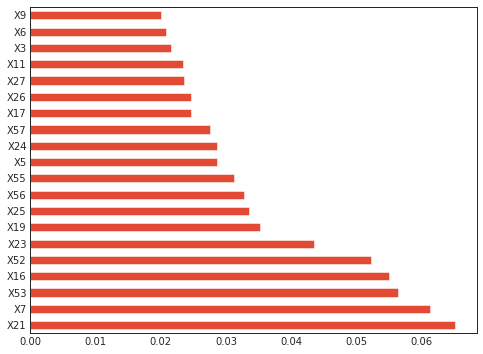

In [133]:
#Using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [134]:
# Check feature importance
tree_importances = model.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)


In [135]:
#checking feature importance dataframe
tree_importance_df.head(2)

,feature,importance
20,X21,0.065167
6,X7,0.061191


In [136]:
#storing top 10 features
top_ten_features=tree_importance_df.head(10)

In [137]:
#displaying top 10 features extracted
top_ten_features

,feature,importance
20,X21,0.065167
6,X7,0.061191
52,X53,0.056336
15,X16,0.054936
51,X52,0.052189
22,X23,0.043443
18,X19,0.035231
24,X25,0.033560
55,X56,0.032806
54,X55,0.031159


In [141]:
#creating dataframe only with top 10 features
df_final= df[['X21','X7','X52','X16','X23','X53','X55','X25','X19','X56','Y']]

In [142]:
#checking head of dataframe
df_final.head(3)

,X21,X7,X52,X16,X23,X53,X55,X25,X19,X56,Y
0,0.00,0.00,1.342,0.0,0.0,0.0,1.200,0.0,0.00,2,0
1,1.12,2.25,0.503,0.0,0.0,0.0,16.304,0.0,3.38,148,1
2,0.00,0.00,0.000,0.0,0.0,0.0,1.000,0.0,8.10,1,0


In [143]:
#statistical description of dataset
df_final.describe()

,X21,X7,X52,X16,X23,X53,X55,X25,X19,X56,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.818253,0.112320,0.272971,0.246598,0.101343,0.077820,5.047150,0.565790,1.660939,52.338107,0.392327
std,1.210078,0.389516,0.858634,0.799327,0.345887,0.256991,31.397035,1.733593,1.760214,204.445218,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,0.000000,0.000000,6.000000,0.000000
50%,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,2.263500,0.000000,1.310000,15.000000,0.000000
75%,1.270000,0.000000,0.317250,0.110000,0.000000,0.054000,3.714000,0.000000,2.637500,43.000000,1.000000
max,11.110000,7.270000,32.478000,20.000000,5.450000,6.003000,1102.500000,20.830000,18.750000,9989.000000,1.000000


Plotting for column X21


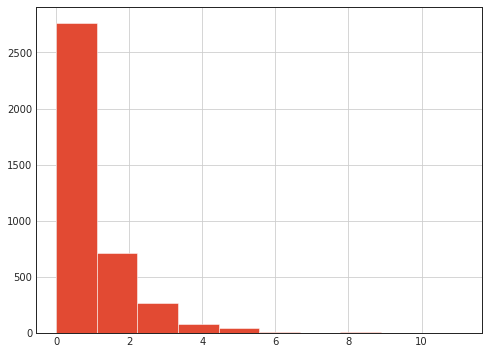

Plotting for column X7


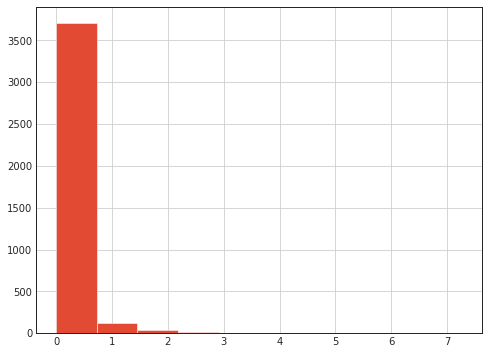

Plotting for column X52


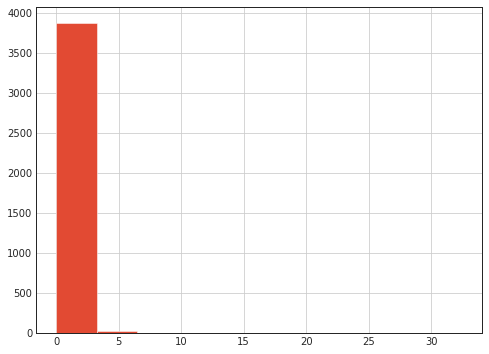

Plotting for column X16


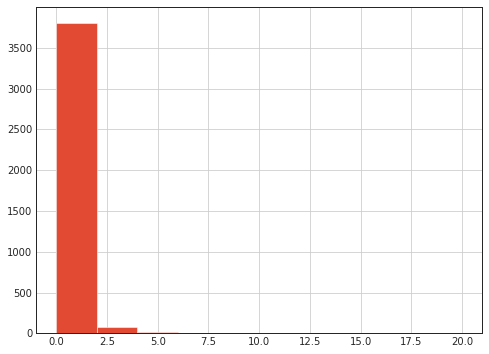

Plotting for column X23


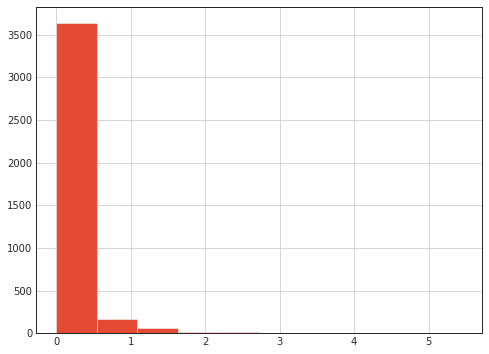

Plotting for column X53


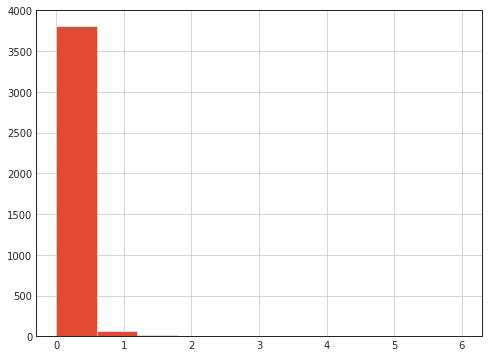

Plotting for column X55


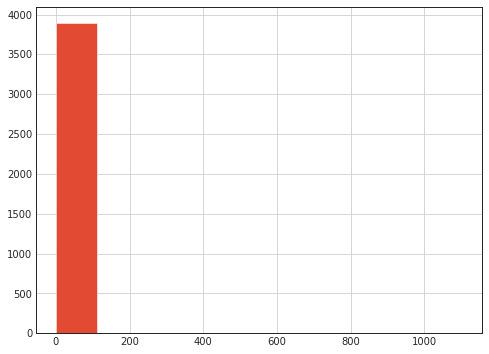

Plotting for column X25


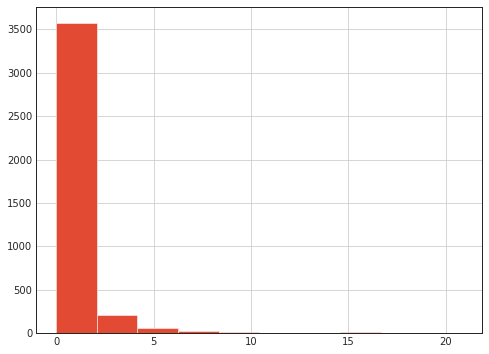

Plotting for column X19


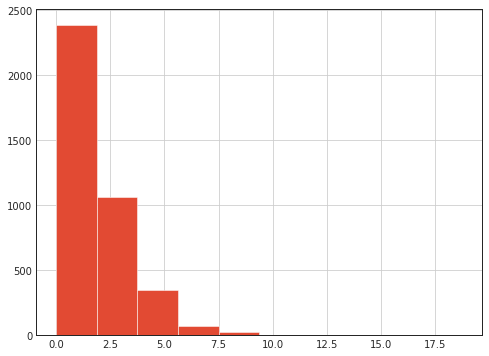

Plotting for column X56


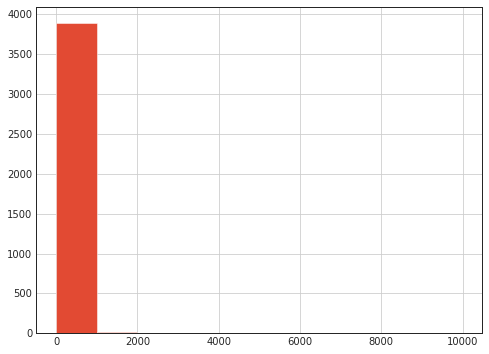

Plotting for column Y


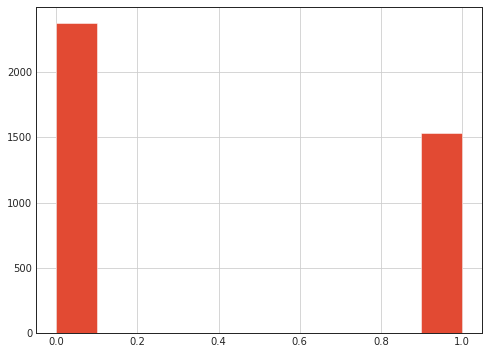

In [144]:
#plotting counts of each column
for col in df_final.columns:
    hist = df_final[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

In [145]:
eda1=df_final.copy()  #removing  all outliers at once
#removing outliers
from scipy import stats
data_c=eda1[(np.abs(stats.zscore(eda1)) < 3).all(axis=1)] # storing in new dataframe

In [146]:
#checking shape of outlier treated dataframe
data_c.shape

(3385, 11)

Description:

For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.

It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.

all(axis=1) ensures that for each row, all column satisfy the constraint.

Finally, the result of this condition is used to index the dataframe.

***So in our raw dataframe we had 3910 rows but after removing outliers we have now 3385 i.e. 525 observations removed from dataset.***

In [147]:
#displaying dataset
data_c

,X21,X7,X52,X16,X23,X53,X55,X25,X19,X56,Y
0,0.00,0.00,1.342,0.00,0.00,0.000,1.200,0.0,0.00,2,0
3,2.58,0.00,0.462,1.29,0.64,0.370,2.440,0.0,1.93,22,1
4,1.74,0.58,0.239,0.58,0.00,0.239,3.338,0.0,0.58,123,1
5,1.08,0.00,0.000,0.00,0.00,0.000,1.263,0.0,1.08,4,0
6,1.02,0.00,0.153,0.00,0.00,0.153,2.705,0.0,2.35,73,1
...,...,...,...,...,...,...,...,...,...,...,...
3903,0.00,0.00,0.000,0.00,0.00,0.000,5.225,0.0,0.00,38,1
3904,0.00,0.00,0.102,0.00,0.00,0.000,4.771,0.0,0.00,26,0
3907,0.51,0.00,0.023,0.12,0.00,0.000,1.247,0.0,2.19,5,0
3908,0.00,0.00,0.198,0.00,0.00,0.198,3.857,0.0,0.00,25,1


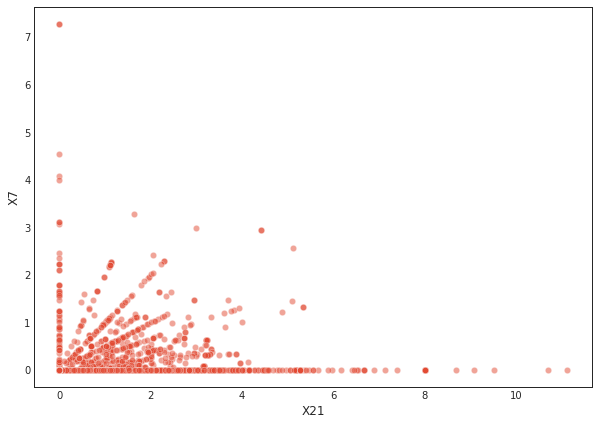

In [148]:
#visualsing inisghts
#plotting X7 and X21 based on raw dataset after feature selection
plt.subplots(figsize=(10,7))
sns.scatterplot(x="X21", y="X7", data=df_final,x_bins=70,y_bins=70,alpha=0.50, s=40 );

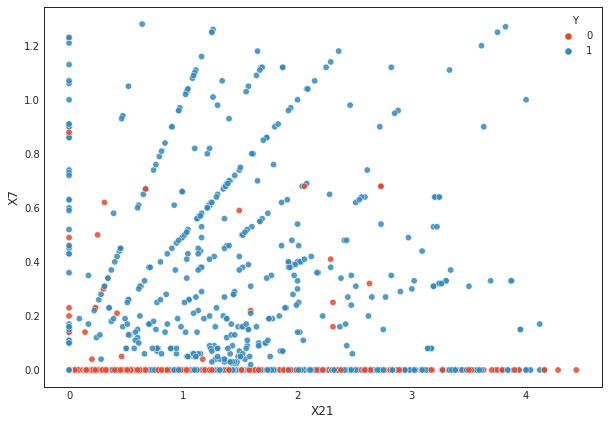

In [149]:
#visualsing inisghts
#plotting X7 and X21 based on cleaned dataset after feature selection
plt.subplots(figsize=(10,7))
sns.scatterplot(x="X21", y="X7", data=data_c,hue='Y',x_bins=95,y_bins=150,alpha=0.85, s=40 );

***So changes in the above two graph can be obserevd clearly as the impact of before & after outlier treatment.*** 

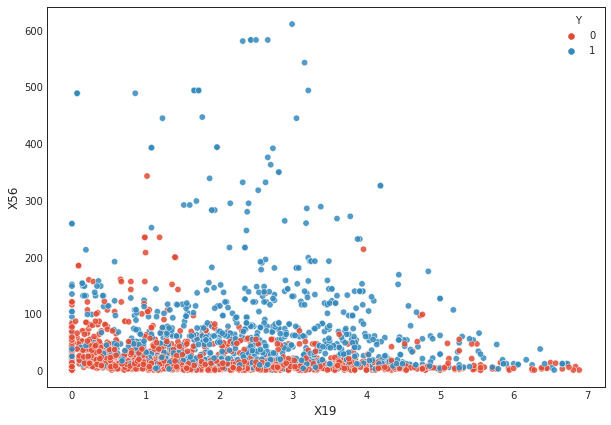

In [150]:
#plotting X56 and X19 based on cleaned dataset after feature selection
plt.subplots(figsize=(10,7))
sns.scatterplot(x="X19", y="X56", data=data_c,hue='Y',x_bins=95,y_bins=150,alpha=0.85, s=40 );

***Making pairplot for all features to get more clear picture as multivariate analysis***

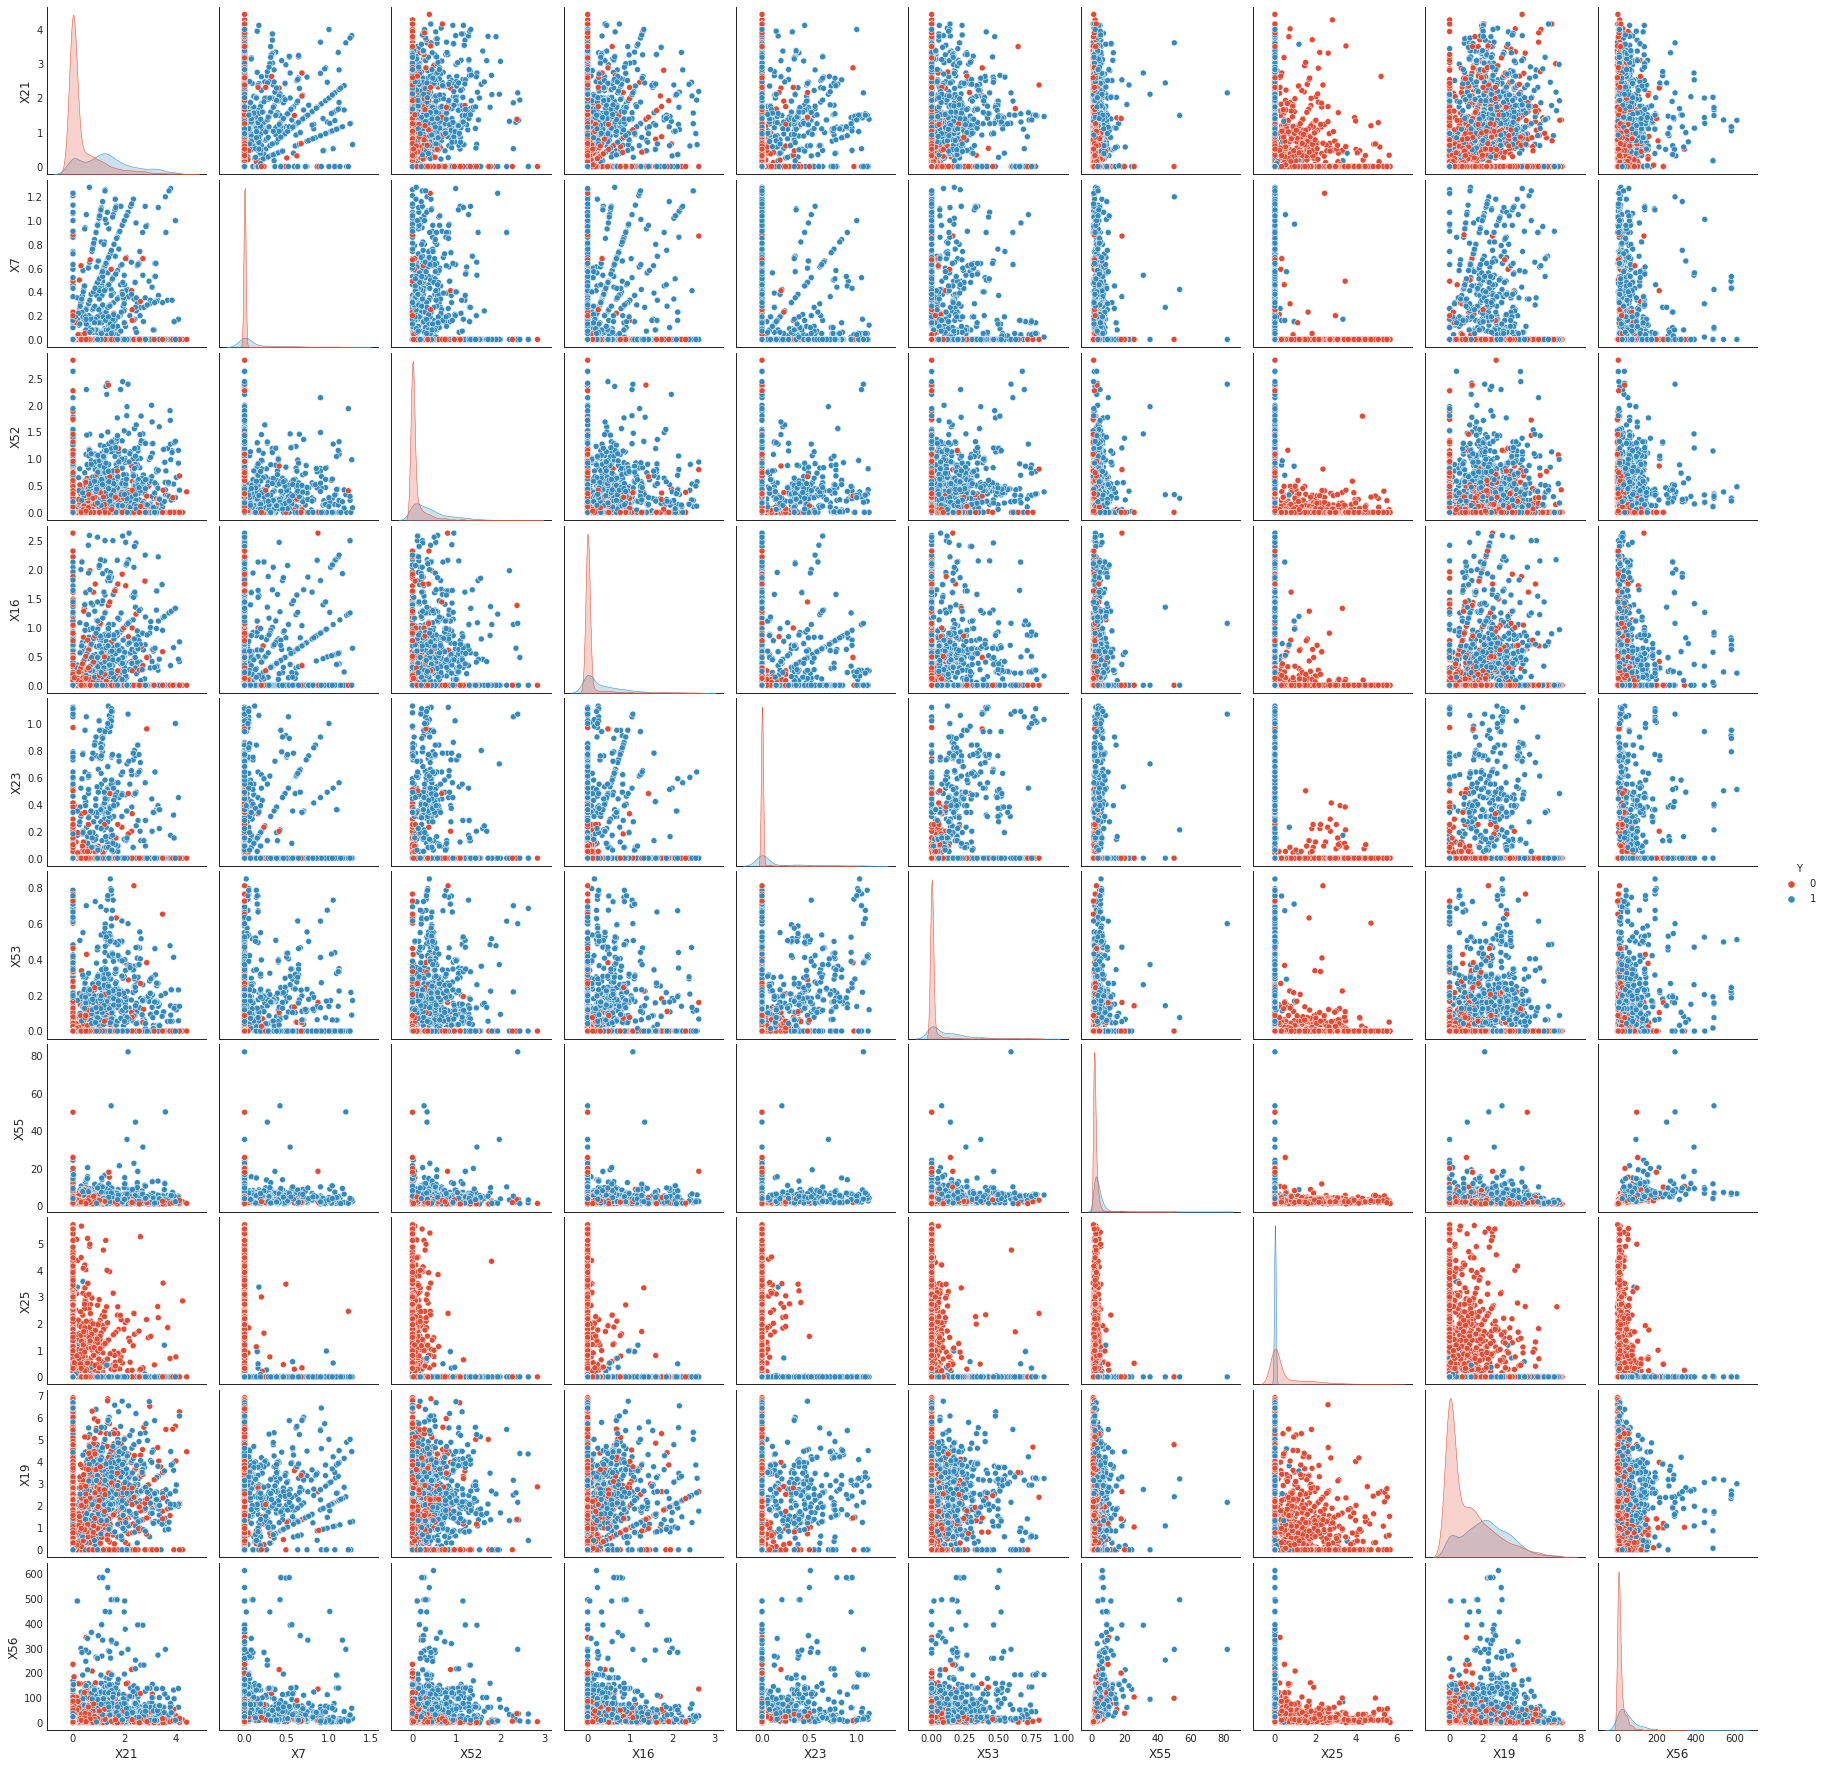

In [151]:
#visualising pairplot for all observations
sns.pairplot(data=data_c,hue='Y')

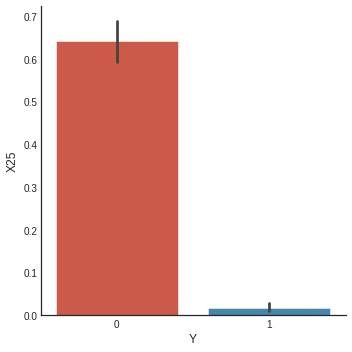

In [198]:
sns.catplot(x="Y", y="X25",  kind="bar", data=data_c)

***The above graph and pairplot clearly shows that feature X25 has most of the values as zero with respect to output variable.***

In [152]:
#displaying unique values and count for each column
data_c.agg(['count',  'nunique'])

,X21,X7,X52,X16,X23,X53,X55,X25,X19,X56,Y
count,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385
nunique,341,116,759,193,102,402,1745,339,512,198,2


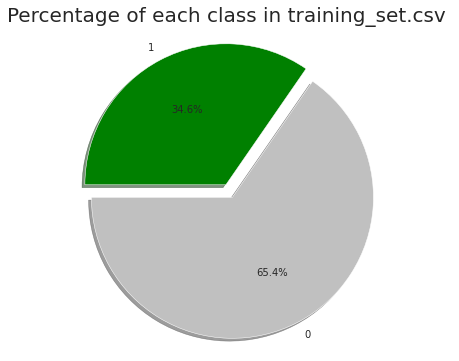

In [153]:
#visualising how many observations we have as 0 and 1
labels = '0' , '1'
sizes = data_c.Y.value_counts()
colors = ['silver', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of each class in training_set.csv ",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

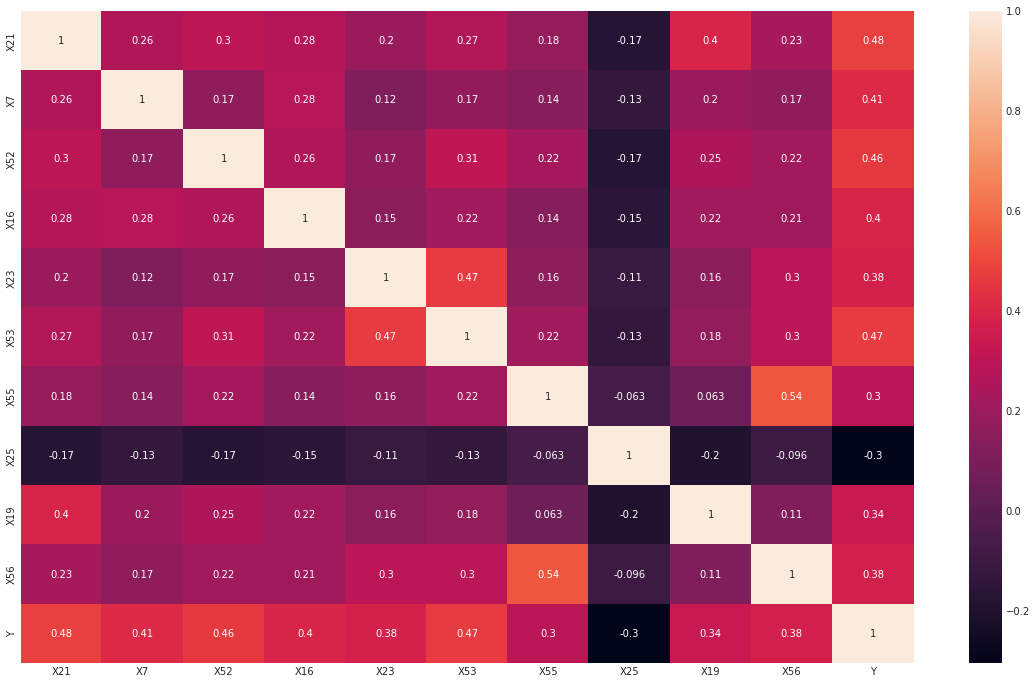

In [154]:
#creating heatmap of cleaned dataset
plt.subplots(figsize=(20,12))
sns.heatmap(data_c.corr(), annot=True)

#***Implementing machine learning model on data*** 

In [155]:
#separating dataset as X and y for traininf and validation
X = data_c.drop(['Y'], axis=1)
y = data_c['Y']

#Splitting the Dataset inro Train Set and Test Set
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [156]:
#create hyperparameter grid for Random forest
rf_grid= {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf' : np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          }

In [157]:
#tune RFC
np.random.seed(42)
#setting up random search hyperparameter search for random forest
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                scoring='roc_auc', return_train_score=True, n_jobs=-1)


# fit random search hyperparameter search for randomforestclassifier
rs_rf_clf.fit(x_train,y_train)
print('Best parameters:  {}'.format(rs_rf_clf.best_params_))
print('Best score: {}'.format(rs_rf_clf.best_score_))

Best parameters:  {'n_estimators': 710, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 1, 'max_depth': 10}
Best score: 0.9673132840413186


**************************************************
Train AUC: 0.984
Val AUC: 0.980
**************************************************
Train Accuracy: 0.948
Val Accuracy: 0.934


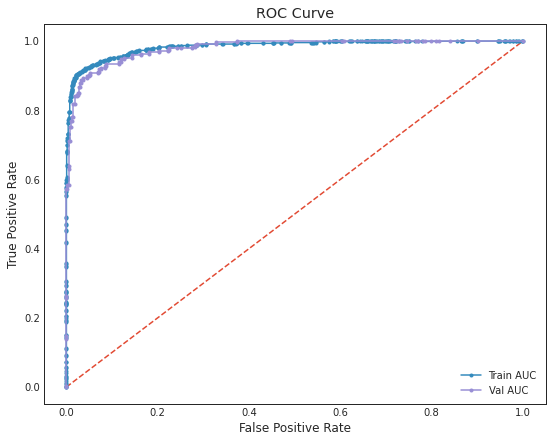

In [158]:
#initialising and training model
model1 = RandomForestClassifier(n_estimators= 710, min_samples_split= 8, min_samples_leaf= 3, max_features= 1, max_depth= 10, n_jobs=-1)
model1.fit(x_train, y_train)
y_probs_train = model1.predict_proba(x_train)
y_probs_val = model1.predict_proba(x_val)
y_predicted_train = model1.predict(x_train)
y_predicted_val = model1.predict(x_val)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_val = y_probs_val[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
val_auc = roc_auc_score(y_val, y_probs_val)
train_acc = accuracy_score(y_train, y_predicted_train)
val_acc = accuracy_score(y_val, y_predicted_val)
f1_s= f1_score(y_val,y_predicted_val)
p_score=precision_score(y_val,y_predicted_val)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Val AUC: %.3f' % val_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Val Accuracy: %.3f' % val_acc)

# dictionary to store accuracy and roc score for each model
score = {}

score['Random Forest (Under sampling)'] = [train_auc, val_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, y_probs_val)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(val_fpr, val_tpr, marker='.', label='Val AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [159]:
#printing classification report
print(classification_report(y_val,y_predicted_val))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       431
           1       0.94      0.87      0.90       246

    accuracy                           0.93       677
   macro avg       0.94      0.92      0.93       677
weighted avg       0.93      0.93      0.93       677



In [160]:
#making confusion matrix
label=y_train.unique()
label=np.sort(label)

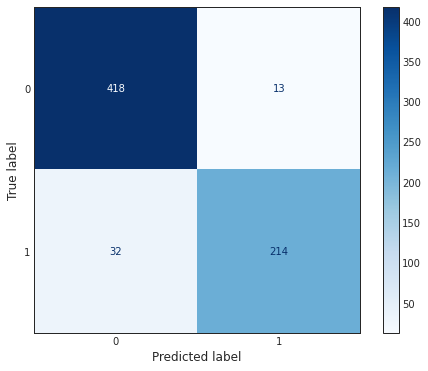

In [161]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(model1,x_val, y_val,labels=label,cmap=plt.cm.Blues)

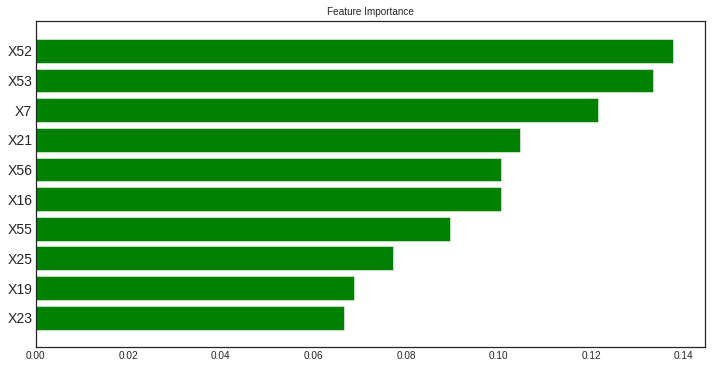

In [162]:
#displaying feature importance of RF classifier
importances = model1.feature_importances_
feature_names = data_c.drop('Y', axis=1).columns
indices = np.argsort(importances)

plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

***Using SHAP for better explainability.***

In [163]:
!pip install shap

In [164]:
#importing shap 
import shap

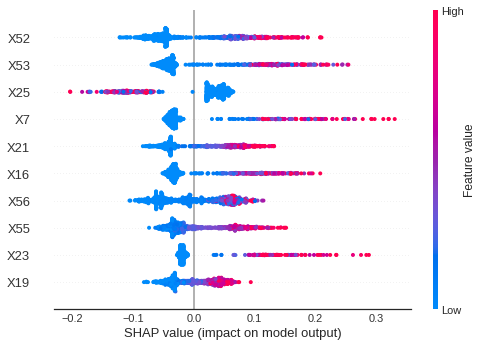

In [165]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model1)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(x_val)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], x_val)

***One important thing to observe that lower the value of X25 higher the effect of this feature on predicting our probabilities/class outcome on output variable. This is also sort of validated by EDA in above steps as X25 has most of the values as zero class (0).***

#***Testing***

In [166]:
#saving our trained model
import joblib

In [167]:
# save
joblib.dump(model1, "/content/drive/MyDrive/Arya_DataScientist_Assignment/random_forest.joblib")

['/content/drive/MyDrive/Arya_DataScientist_Assignment/random_forest.joblib']

In [168]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("/content/drive/MyDrive/Arya_DataScientist_Assignment/random_forest.joblib")

In [169]:
#loading our trained random forest classifier
loaded_rf

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=710, n_jobs=-1)

In [170]:
#Loading  Dataset
df_test= pd.read_csv('/content/drive/MyDrive/Arya_DataScientist_Assignment/test_set.csv', low_memory= False)

In [171]:
#head of test dataset
df_test.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [172]:
#statistical description of our test dataset
df_test.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.00000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,345.000000,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,0.054255,0.473893,0.092894,0.066671,0.052938,0.261577,0.141491,0.180391,1.668669,0.095181,0.761708,0.172634,0.103357,0.089001,0.457352,0.258119,0.824935,0.122200,0.09097,0.089146,0.058495,0.049797,0.113907,0.050246,0.088423,0.115687,0.148119,0.011722,0.069247,0.063459,0.036353,0.093618,0.037554,0.063401,0.233734,0.163763,0.001997,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,199.618803,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,0.193042,0.770257,0.287302,0.460284,0.278251,0.962487,0.443760,0.556946,1.860817,0.799695,1.146614,1.206941,0.374469,0.438095,1.259678,0.854455,3.617189,0.495914,0.50045,0.409787,0.368296,0.364195,0.647490,0.364229,0.406143,0.442055,0.497177,0.249035,0.491256,0.367637,0.267692,0.536883,0.177095,0.407094,0.637226,0.690451,0.031495,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,172.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.220000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,517.500000,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.700000,0.000000,0.000000,0.000000,0.085000,0.000000,0.000000,2.660000,0.000000,1.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.189000,0.000000,0.307500

In [173]:
#selecting those feature on which our model was trained 
df_final_test= df_test[['X21','X7','X52','X16','X23','X53','X55','X25','X19','X56']]

In [174]:
#making predictions on test dataset
y_predicted = loaded_rf.predict(df_final_test)

In [175]:
#listing out predictions
y_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [176]:
#creating dataframe with predictions 
df_check = pd.DataFrame(y_predicted, columns = ['Y'])

In [177]:
#merging dataframe 
df_out = pd.merge(df_test,df_check,how = 'left',left_index = True, right_index = True)

In [178]:
#prinitng out final dataframe along with predictions
df_out

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.70,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,1.41,1.41,0.0,0.00,0.000,0.000,0.000,0.105,0.000,0.000,2.342,47,89,0
1,1,0.00,0.00,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.388,0.000,0.776,0.129,0.000,10.375,168,249,1
2,2,0.46,0.30,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.02,0.00,0.0,0.00,0.000,0.065,0.000,0.325,0.756,0.153,5.891,193,3040,1
3,3,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.20,0.00,0.10,0.10,0.0,0.00,0.000,0.110,0.000,0.490,0.158,0.015,8.550,669,1351,1
4,4,0.00,0.00,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.364,0.000,0.729,0.121,0.000,7.781,32,249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,686,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.0,0.00,0.0,0.00,0.00,2.06,1.03,0.25,0.25,0.25,0.25,0.25,0.25,2.83,0.25,0.25,0.25,0.25,0.0,0.0,0.25,0.0,0.00,0.25,0.00,0.25,0.00,0.0,0.00,0.301,0.473,0.043,0.043,0.000,0.000,2.111,17,190,0
687,687,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,5.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.56,2.56,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2.56,0.00,0.0,2.56,0.000,0.000,0.000,0.375,0.000,0.000,2.250,7,36,0
688,688,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,2.333,5,7,0
689,689,0.08,0.08,0.57,0.0,0.48,0.00,0.00,0.08,0.00,0.00,0.00,0.81,0.08,0.00,0.08,0.00,0.81,0.00,0.65,0.0,0.40,0.0,0.00,0.00,1.38,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.16,0.00,0.08,0.00,0.08,0.0,0.0,0.08,0.0,0.89,0.00,0.24,0.08,0.00,0.0,0.08,0.011,0.034,0.000,0.057,0.022,0.000,1.875,65,542,0


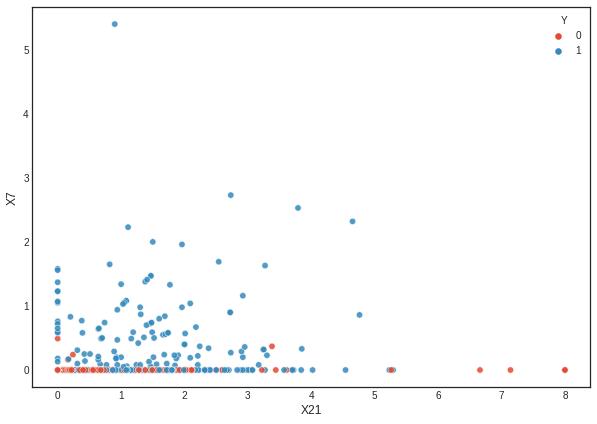

In [179]:
#plotting garph for features of test dataset
plt.subplots(figsize=(10,7))
sns.scatterplot(x="X21", y="X7", data=df_out,hue='Y',x_bins=95,y_bins=150,alpha=0.85, s=40 );

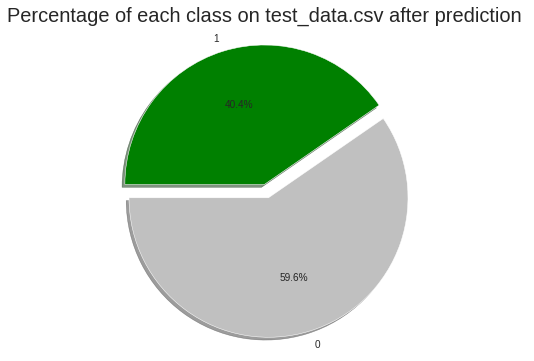

In [180]:
#visualising class distribution on test dataset
labels = '0' , '1'
sizes = df_out.Y.value_counts()
colors = ['silver', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of each class on test_data.csv after prediction ",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

#README

(https://docs.google.com/document/d/10k4jiMTsGxI1UsVkf6T1EmAvuIgVkwUSd4PG3TIa2KA/edit?usp=sharing)

